# Heart Dataset

It's a Regreesion Problem.

## steps -

- [Installation](#installation)
- [cleanup](#Dataset_cleanup)
- [EDA](#EDA)
- [Feature_selection](#Feature_selection)
- [feature_extraction](#Feature_extraction)
- [model_selection](#Model_selection)

## Installation

- IMPORT ALL REQUIRED LIBRARIES


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

import template

import mlflow
import optuna


In [50]:
#mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./mlruns --host 0.0.0.0 --port 8080


In [51]:
get_dir = os.getcwd()
data_dir = os.path.join(get_dir,"Datasets","heart.csv")
data = pd.read_csv(data_dir)

In [52]:
# NOTE: review the links mentioned above for guidance on connecting to a managed tracking server, such as the free Databricks Community Edition

mlflow.set_tracking_uri("http://localhost:5000")


# Dataset_cleanup

In [53]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [54]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target      float64
dtype: object

In [55]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.536390
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.285822
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.260000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.710000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,0.810000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.900000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


In [57]:
data_val = template.data_val(data)
zero_count = data_val.zero_count()
print(zero_count)

   Column_name  Zeros
0          age      0
1          sex    312
2           cp    497
3     trestbps      0
4         chol      0
5          fbs    872
6      restecg    497
7      thalach      0
8        exang    680
9      oldpeak    329
10       slope     74
11          ca    578
12        thal      7
13      target      0


In [58]:
data["fbs"].unique()

array([0, 1], dtype=int64)

The number of zero counts is not equal to the total number of samples. This indicates that there are no columns with all zero values
though column "fbs" has 85% zero counts but for now keep this feature

# EDA

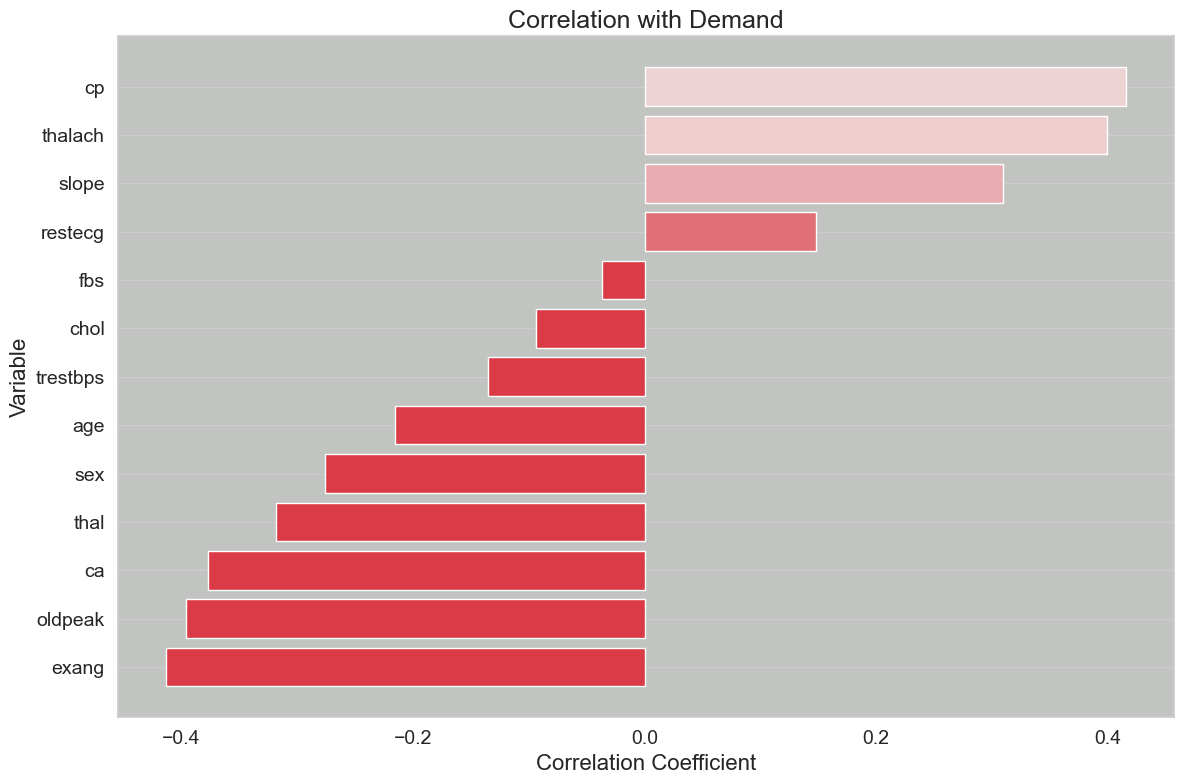

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_correlation_with_demand(df, save_path=None):
    """
    Plots the correlation of each variable in the dataframe with the 'demand' column.

    Args:
    - df (pd.DataFrame): DataFrame containing the data, including a 'demand' column.
    - save_path (str, optional): Path to save the generated plot. If not specified, plot won't be saved.

    Returns:
    - None (Displays the plot on a Jupyter window)
    """

    # Compute correlations between all variables and 'demand'
    correlations = df.corr()["target"].drop("target").sort_values()

    # Generate a color palette from red to green
    colors = sns.diverging_palette(10, 130, as_cmap=True)
    color_mapped = correlations.map(colors)

    # Set Seaborn style
    sns.set_style(
        "whitegrid", {"axes.facecolor": "#c2c4c2", "grid.linewidth": 1.5}
    )  # Light grey background and thicker grid lines

    # Create bar plot
    fig = plt.figure(figsize=(12, 8))
    plt.barh(correlations.index, correlations.values, color=color_mapped)

    # Set labels and title with increased font size
    plt.title("Correlation with Demand", fontsize=18)
    plt.xlabel("Correlation Coefficient", fontsize=16)
    plt.ylabel("Variable", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(axis="x")

    plt.tight_layout()

    # Save the plot if save_path is specified
    if save_path:
        plt.savefig(save_path, format="png", dpi=600)

    

    return fig


# Test the function
correlation_plot = plot_correlation_with_demand(data, save_path="correlation_plot.png")


In [60]:
def plot_residuals(model, dvalid, valid_y, save_path=None):
    """
    Plots the residuals of the model predictions against the true values.

    Args:
    - model: The trained XGBoost model.
    - dvalid (xgb.DMatrix): The validation data in XGBoost DMatrix format.
    - valid_y (pd.Series): The true values for the validation set.
    - save_path (str, optional): Path to save the generated plot. If not specified, plot won't be saved.

    Returns:
    - None (Displays the residuals plot on a Jupyter window)
    """

    # Predict using the model
    preds = model.predict(dvalid)

    # Calculate residuals
    residuals = valid_y - preds

    # Set Seaborn style
    sns.set_style("whitegrid", {"axes.facecolor": "#c2c4c2", "grid.linewidth": 1.5})

    # Create scatter plot
    fig = plt.figure(figsize=(12, 8))
    plt.scatter(valid_y, residuals, color="blue", alpha=0.5)
    plt.axhline(y=0, color="r", linestyle="-")

    # Set labels, title and other plot properties
    plt.title("Residuals vs True Values", fontsize=18)
    plt.xlabel("True Values", fontsize=16)
    plt.ylabel("Residuals", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(axis="y")

    plt.tight_layout()

    # Save the plot if save_path is specified
    if save_path:
        plt.savefig(save_path, format="png", dpi=600)

    

    return fig


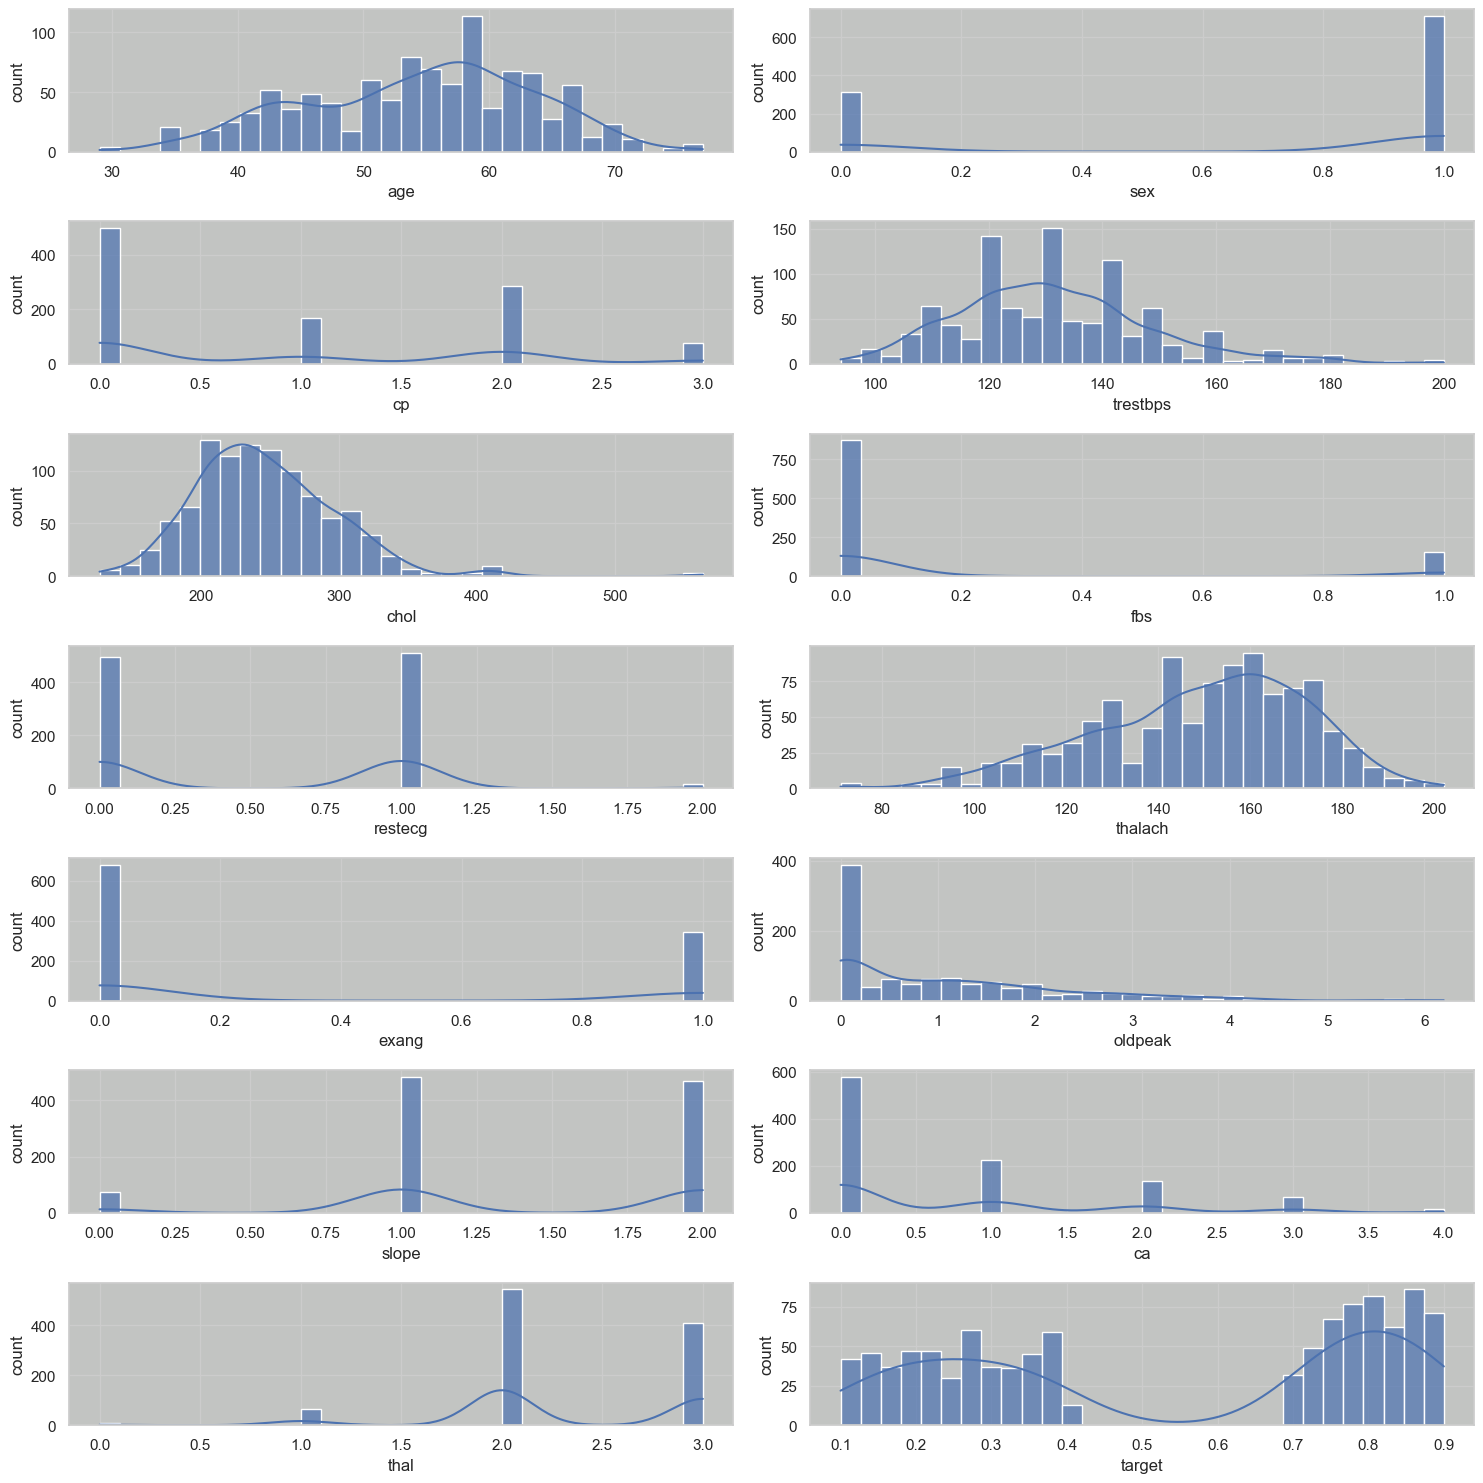

In [61]:
data_val.histplot_columns1(7,2,figuresize=(15,15))

In [62]:
column_type = data_val.get_column_type()

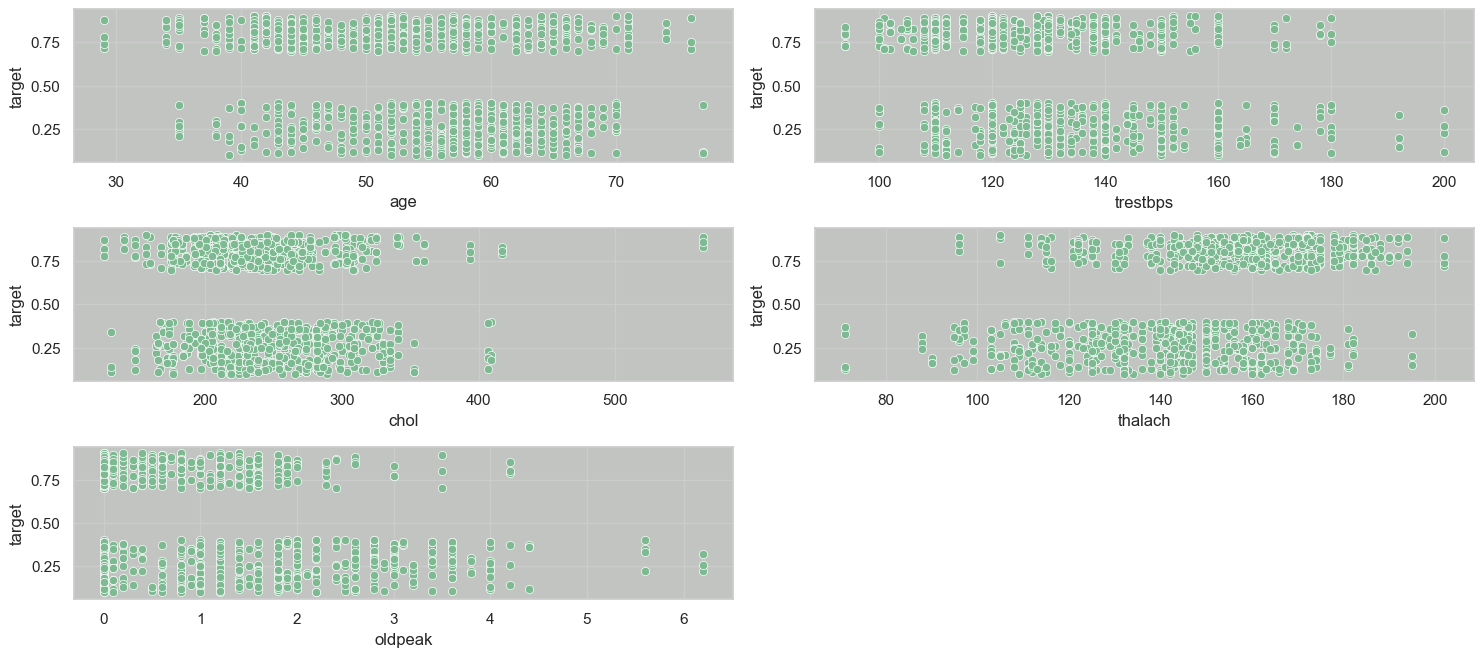

In [63]:
data_val.scatterplot1(7,2,figuresize=(15,15),column_type=column_type)

In [64]:
numerical_column = []
for i in data.columns:
    if column_type[i] == "numerical":
        numerical_column.append(i)


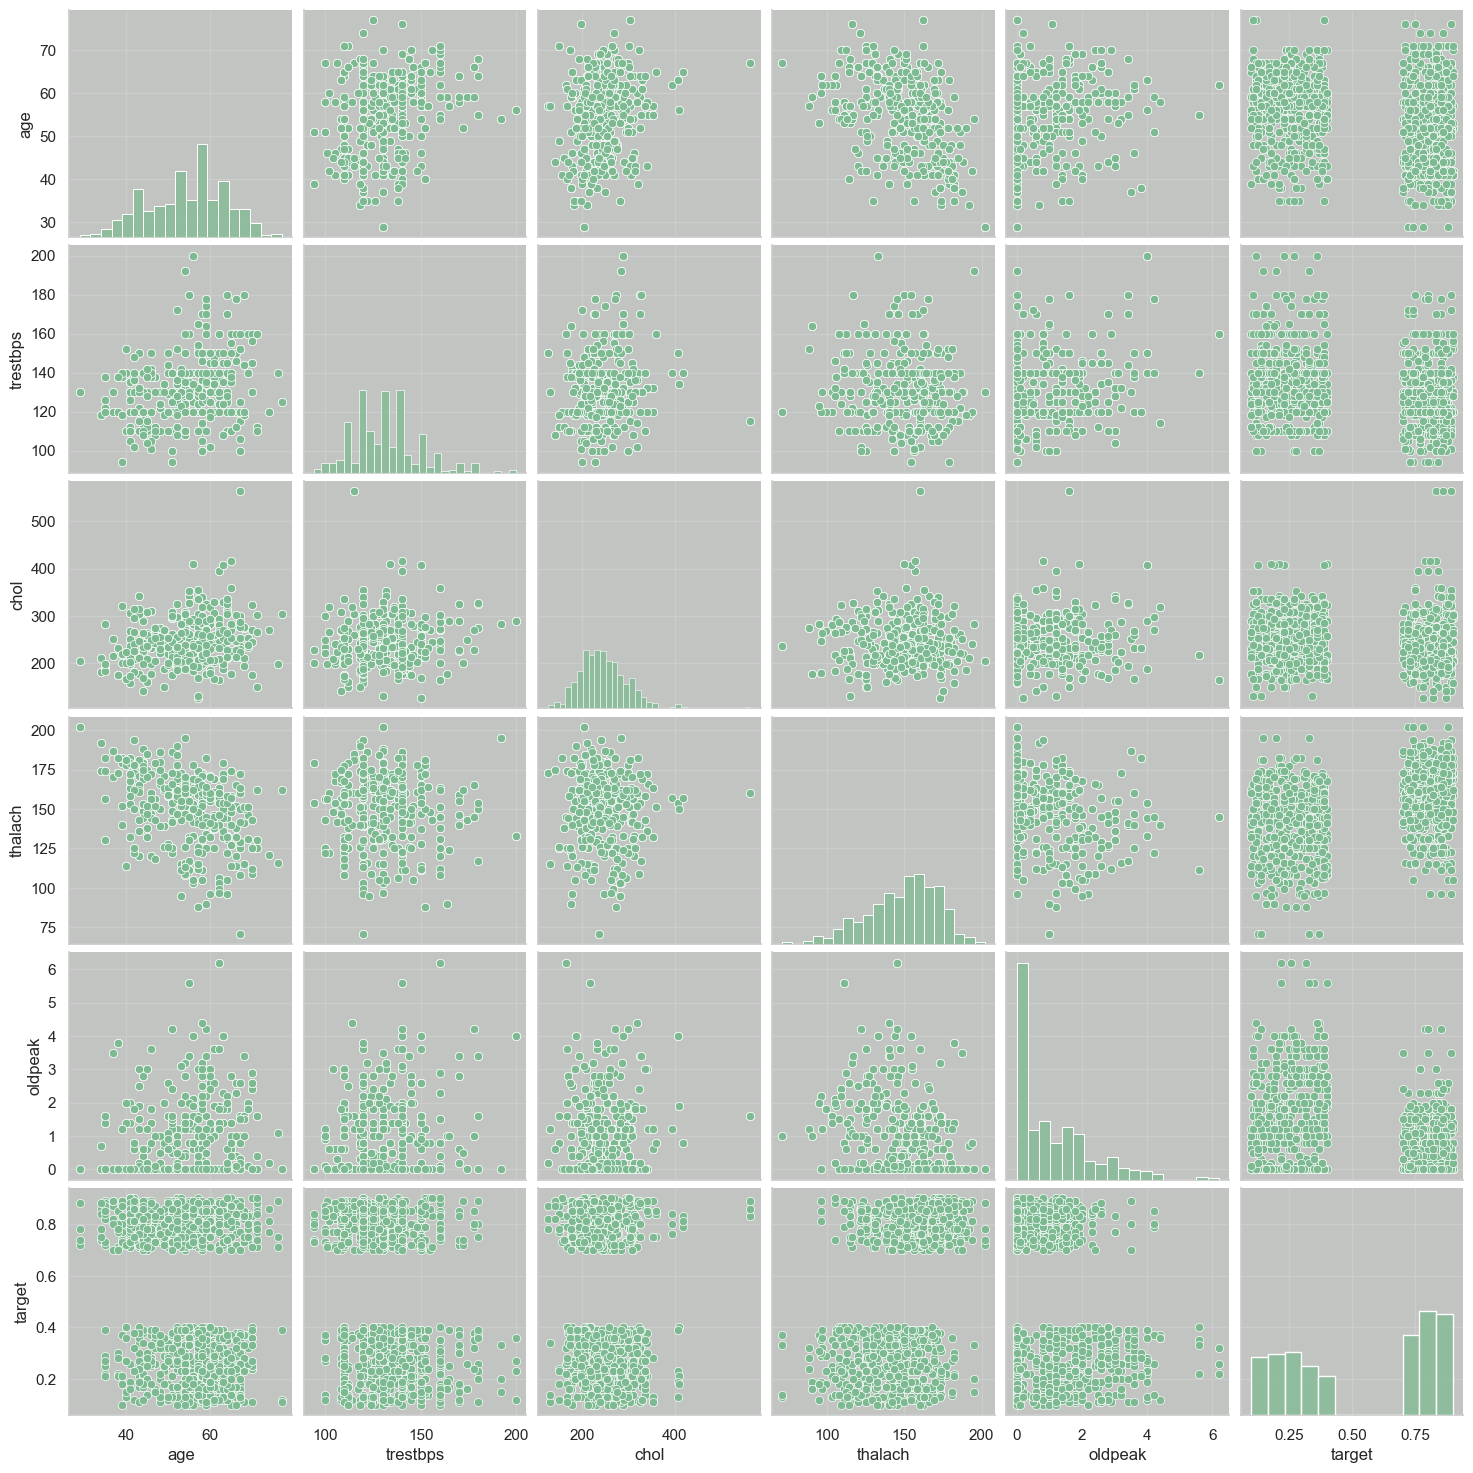

In [65]:
sns.pairplot(data = data[numerical_column])

In [66]:
print(pd.DataFrame(list(column_type.items()), columns=["columns","type"]))

     columns         type
0        age    numerical
1        sex  categorical
2         cp  categorical
3   trestbps    numerical
4       chol    numerical
5        fbs  categorical
6    restecg  categorical
7    thalach    numerical
8      exang  categorical
9    oldpeak    numerical
10     slope  categorical
11        ca  categorical
12      thal  categorical
13    target    numerical


In [67]:
schema = data_val.schema()
print(schema)

     columns    dtype
0        age    int64
1        sex    int64
2         cp    int64
3   trestbps    int64
4       chol    int64
5        fbs    int64
6    restecg    int64
7    thalach    int64
8      exang    int64
9    oldpeak  float64
10     slope    int64
11        ca    int64
12      thal    int64
13    target  float64


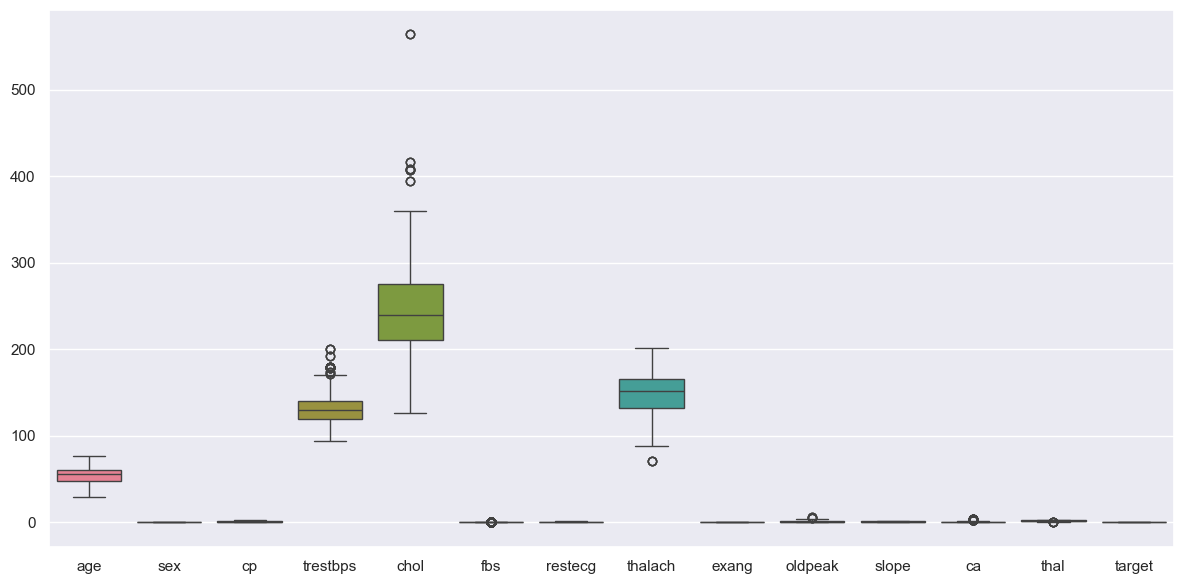

In [68]:
sns.set_theme()
plt.figure(figsize=(12,6))
sns.boxplot(data=data)
plt.tight_layout()
plt.show()

In [69]:
data_cleaned = data_val.remove_outliers()

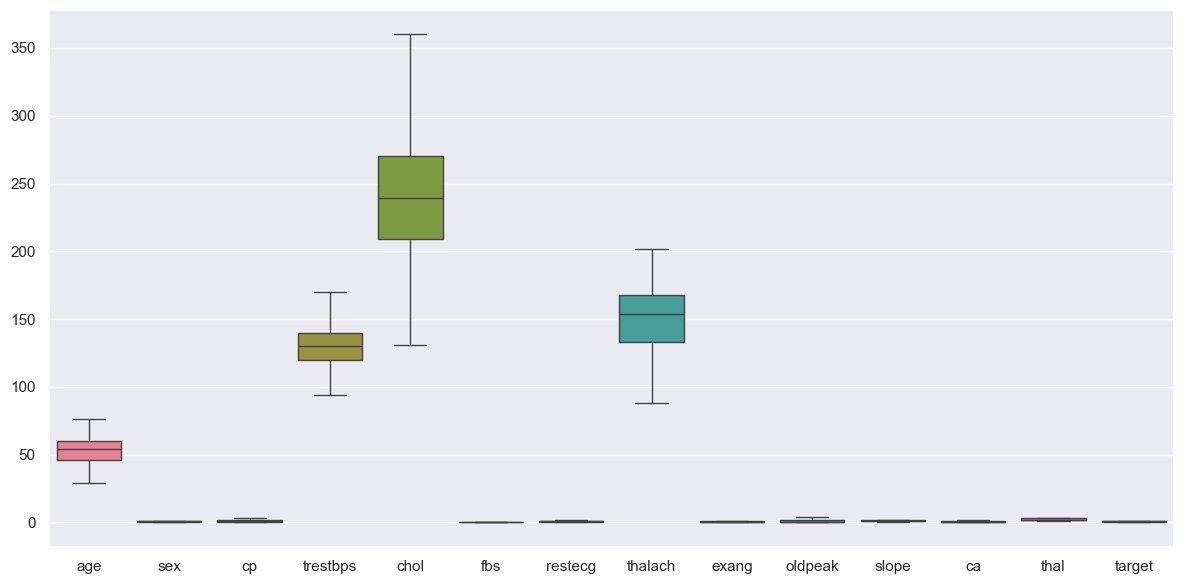

In [70]:

sns.set_theme()
plt.figure(figsize=(12,6))
sns.boxplot(data=data_cleaned)
plt.tight_layout()
plt.show()

In [71]:
data_scaled = data_val.scale_dataset(scaler1=MinMaxScaler)

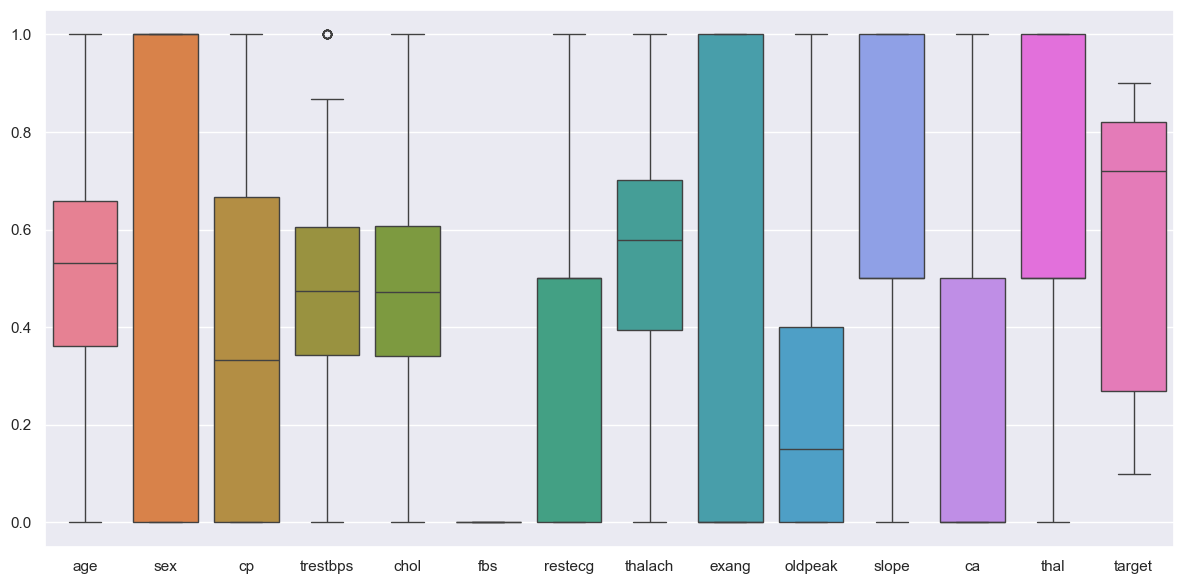

In [72]:
sns.set_theme()
plt.figure(figsize=(12,6))
sns.boxplot(data=data_scaled)
plt.tight_layout()
plt.show()

<Axes: ylabel='Density'>

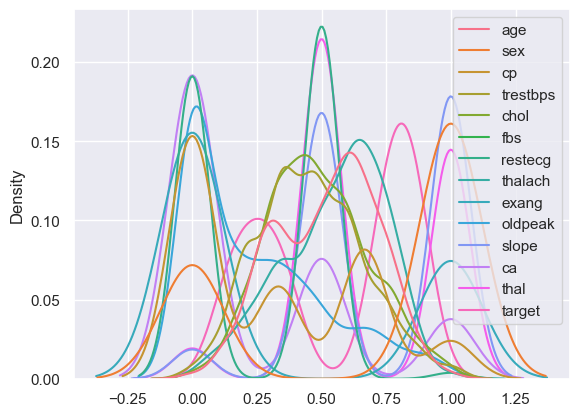

In [73]:
sns.kdeplot(data=data_scaled)

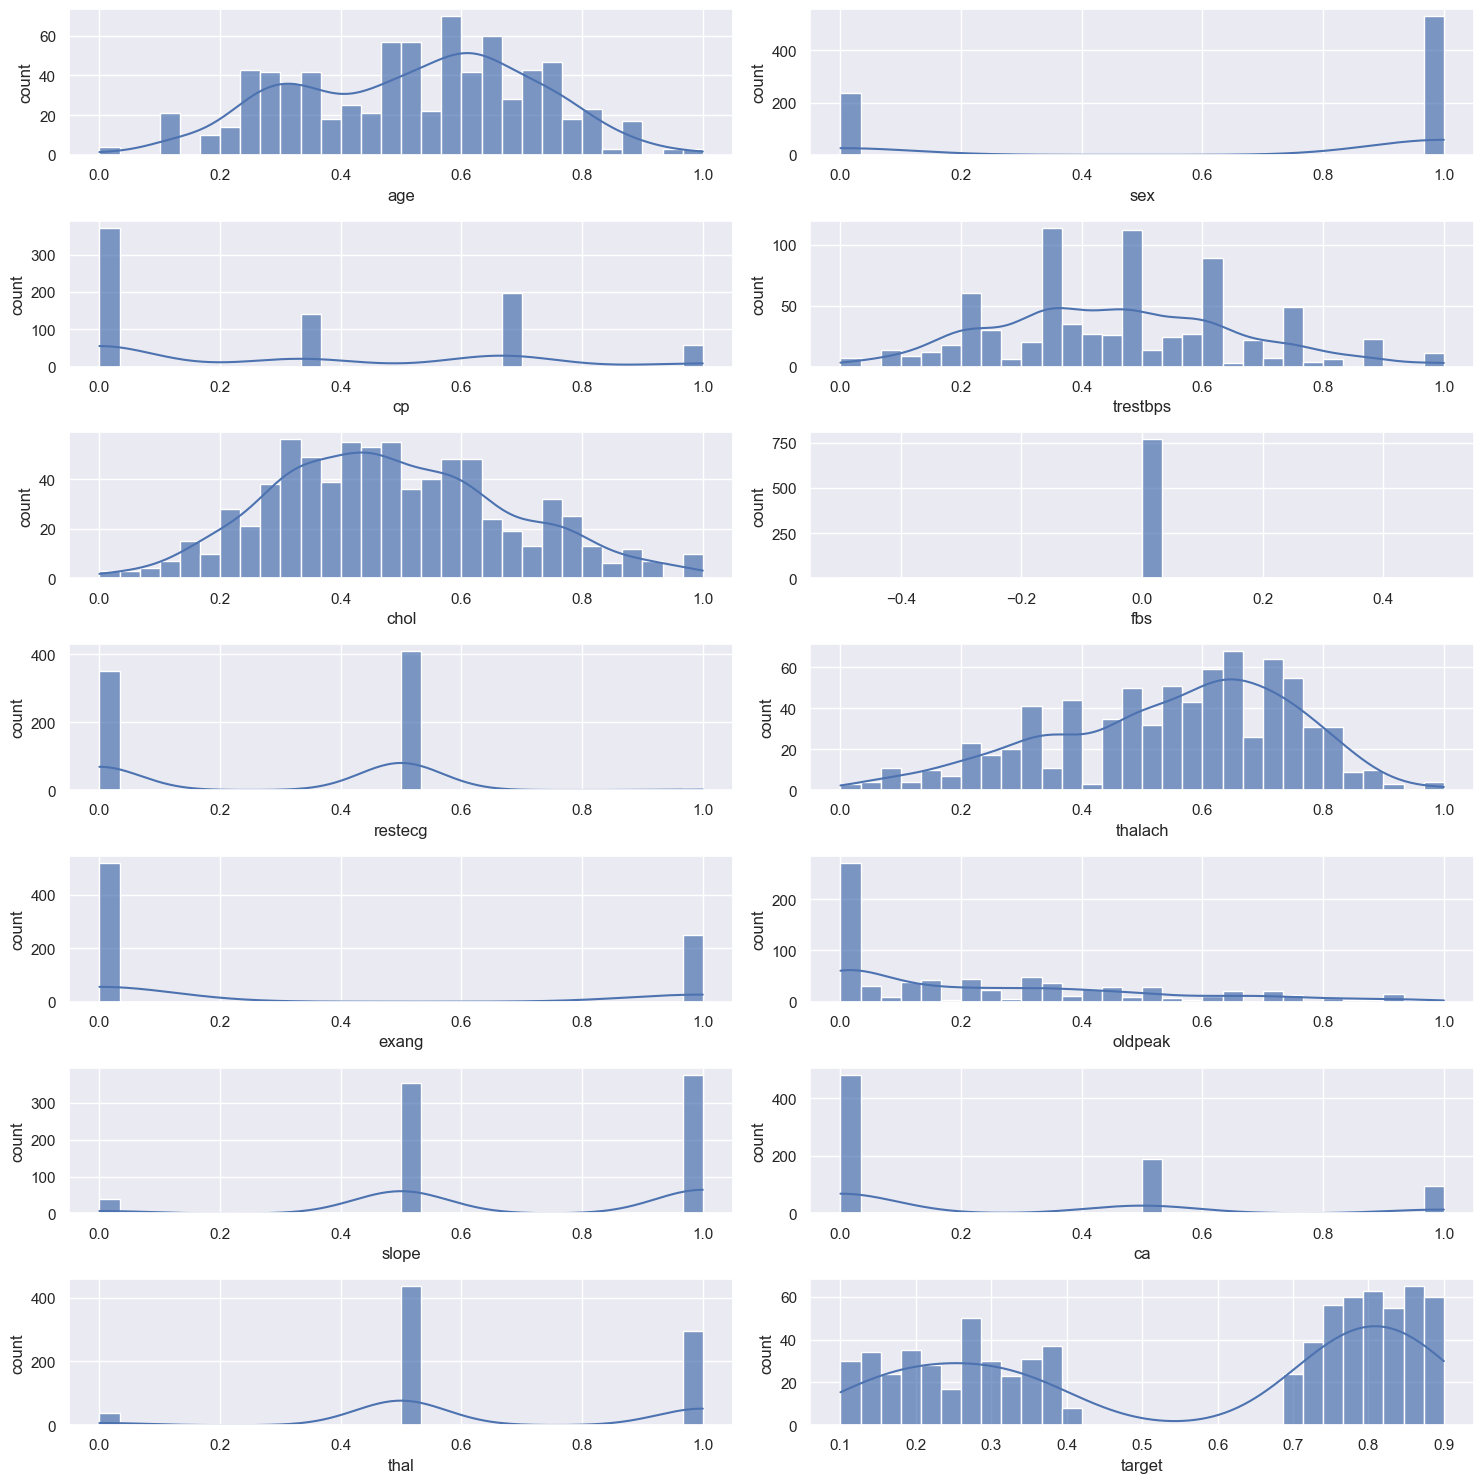

In [74]:
data_val.histplot_columns1(7,2,figuresize=(15,15))

In [75]:
data_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.489362,1.0,0.0,0.407895,0.353712,0.0,0.5,0.701754,0.0,0.25,1.0,1.0,1.0,0.23
1,0.872340,1.0,0.0,0.671053,0.187773,0.0,0.5,0.324561,1.0,0.65,0.0,0.0,1.0,0.24
2,0.680851,1.0,0.0,0.710526,0.314410,0.0,0.5,0.640351,0.0,0.00,1.0,0.5,1.0,0.28
3,0.617021,0.0,0.0,0.078947,0.510917,0.0,0.0,0.298246,0.0,0.25,0.5,0.0,0.5,0.78
4,0.553191,1.0,0.0,0.868421,0.689956,0.0,0.0,0.500000,1.0,0.20,0.5,0.5,1.0,0.17


In [76]:
data_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.489362,1.0,0.0,0.407895,0.353712,0.0,0.5,0.701754,0.0,0.25,1.0,1.0,1.0,0.23
1,0.872340,1.0,0.0,0.671053,0.187773,0.0,0.5,0.324561,1.0,0.65,0.0,0.0,1.0,0.24
2,0.680851,1.0,0.0,0.710526,0.314410,0.0,0.5,0.640351,0.0,0.00,1.0,0.5,1.0,0.28
3,0.617021,0.0,0.0,0.078947,0.510917,0.0,0.0,0.298246,0.0,0.25,0.5,0.0,0.5,0.78
4,0.553191,1.0,0.0,0.868421,0.689956,0.0,0.0,0.500000,1.0,0.20,0.5,0.5,1.0,0.17


<Axes: >

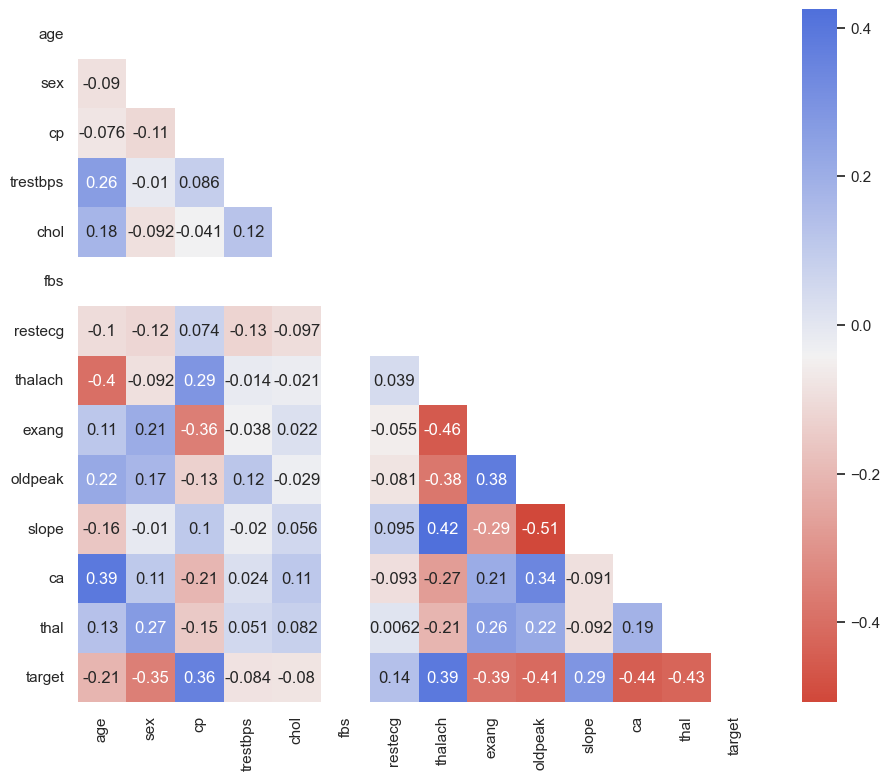

In [77]:
corrmap = data_scaled.corr()
sns.set_theme(style="white")
plt.figure(figsize=(11,9))
mask = np.triu(np.ones_like(corrmap, dtype=bool))
cmap = sns.diverging_palette(15,260, as_cmap=True)
sns.heatmap(corrmap,cmap=cmap,mask=mask,annot=True)

In [78]:
def plot_residuals(model, dvalid, valid_y, save_path=None):
    """
    Plots the residuals of the model predictions against the true values.

    Args:
    - model: The trained XGBoost model.
    - dvalid (xgb.DMatrix): The validation data in XGBoost DMatrix format.
    - valid_y (pd.Series): The true values for the validation set.
    - save_path (str, optional): Path to save the generated plot. If not specified, plot won't be saved.

    Returns:
    - None (Displays the residuals plot on a Jupyter window)
    """

    # Predict using the model
    preds = model.predict(dvalid)

    # Calculate residuals
    residuals = valid_y - preds

    # Set Seaborn style
    sns.set_style("whitegrid", {"axes.facecolor": "#c2c4c2", "grid.linewidth": 1.5})

    # Create scatter plot
    fig = plt.figure(figsize=(12, 8))
    plt.scatter(valid_y, residuals, color="blue", alpha=0.5)
    plt.axhline(y=0, color="r", linestyle="-")

    # Set labels, title and other plot properties
    plt.title("Residuals vs True Values", fontsize=18)
    plt.xlabel("True Values", fontsize=16)
    plt.ylabel("Residuals", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(axis="y")

    plt.tight_layout()

    # Save the plot if save_path is specified
    if save_path:
        plt.savefig(save_path, format="png", dpi=600)

    

    return fig


In [79]:
def get_or_create_experiment(experiment_name):
    """
    Retrieve the ID of an existing MLflow experiment or create a new one if it doesn't exist.

    This function checks if an experiment with the given name exists within MLflow.
    If it does, the function returns its ID. If not, it creates a new experiment
    with the provided name and returns its ID.

    Parameters:
    - experiment_name (str): Name of the MLflow experiment.

    Returns:
    - str: ID of the existing or newly created MLflow experiment.
    """

    if experiment := mlflow.get_experiment_by_name(experiment_name):
        return experiment.experiment_id
    else:
        return mlflow.create_experiment(experiment_name)


In [80]:
experiment_id = get_or_create_experiment("Heart1")

In [81]:
experiment_id = 549690925350446637


In [82]:
# Set the current active MLflow experiment
mlflow.set_experiment(experiment_id=experiment_id)

<Experiment: artifact_location='mlflow-artifacts:/549690925350446637', creation_time=1719724771482, experiment_id='549690925350446637', last_update_time=1719724771482, lifecycle_stage='active', name='Heart1', tags={}>

In [83]:
x = data.drop(columns="target")
y = data["target"]

In [84]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.25,random_state=42)

# Feature_selection

UNIVARIATE FEATURE SELECTION

In [85]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import KFold

# Minimum number of features to consider
min_features_to_select = 1

# Define the estimator
clf = LassoLarsCV()

# Define the cross-validation strategy
cv = KFold(5)

# Configure the RFECV
rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="neg_mean_squared_error",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)

# Fit the model
rfecv.fit(x_train1, y_train1)

# Print the optimal number of features
print(f"Optimal number of features: {rfecv.n_features_}")



Optimal number of features: 12


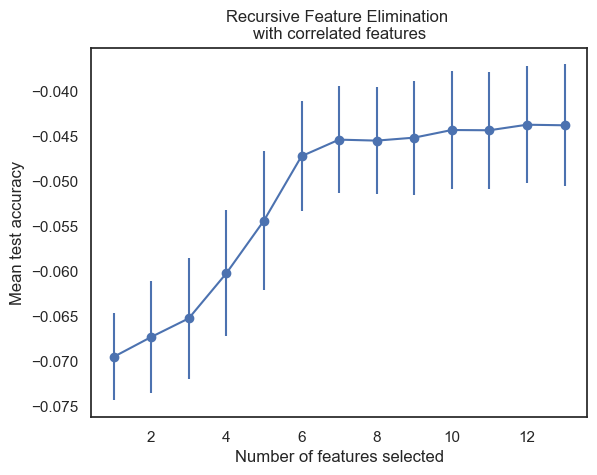

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming rfecv is your RFECV object
cv_results = pd.DataFrame(rfecv.cv_results_)

# Adding the n_features column
cv_results['n_features'] = range(1, len(cv_results) + 1)

# Plotting the results
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
    fmt='-o'  # Add this for better visualization (line with circle markers)
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [87]:
import numpy as np

# Fit the model
rfecv.fit(x_train1, y_train1)

# Print the optimal number of features
print(f"Optimal number of features: {rfecv.n_features_}")

# Get the boolean mask indicating selected features
selected_features_mask = rfecv.support_

# If x_train1 is a DataFrame, get the column names
if hasattr(x_train1, 'columns'):
    selected_features = x_train1.columns[selected_features_mask]
else:
    selected_features = np.array(range(x_train1.shape[1]))[selected_features_mask]

# Print the selected features
print(f"Selected features: {selected_features}")


Optimal number of features: 12
Selected features: Index(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [88]:
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression

In [89]:
x_train2 = SelectKBest(f_regression,k=12).fit(x_train1,y_train1)

In [90]:
x_train3 = SelectKBest(mutual_info_regression,k=12).fit(x_train1,y_train1)

In [91]:
selcted_features1 = x_train2.get_feature_names_out()

selcted_features2 = x_train3.get_feature_names_out()
print(selcted_features1,"\n",selcted_features2)

['age' 'sex' 'cp' 'trestbps' 'chol' 'restecg' 'thalach' 'exang' 'oldpeak'
 'slope' 'ca' 'thal'] 
 ['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'thalach' 'exang' 'oldpeak'
 'slope' 'ca' 'thal']


In [92]:
features_set1 = set(selcted_features1)
features_set2 = set(selcted_features2)
combined_features_set = features_set1.union(features_set2)
combined_features_list = list(combined_features_set)
print(combined_features_list)

['thalach', 'slope', 'trestbps', 'sex', 'oldpeak', 'cp', 'restecg', 'exang', 'chol', 'ca', 'thal', 'fbs', 'age']


lets just analyse and summarise what we have seen about data till now :
1. Data has no linear relationship between feature and target
2. Data has nearly 13 features
3. Data has 1025 sample size per column
4. Nearly 4 feature has 0.4 or higher correlation with target
 

In [93]:
x_train2 = x_train1[selected_features] 
x_test2 = x_test1[selected_features]

# Model Selection

In [94]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import  make_pipeline,Pipeline
from sklearn.linear_model import (LinearRegression, Ridge, RidgeCV, SGDRegressor, ElasticNet, ElasticNetCV, 
                                  LarsCV, Lasso, LassoCV, LassoLars, LassoLarsCV, LassoLarsIC, ARDRegression, 
                                  BayesianRidge, HuberRegressor, QuantileRegressor, RANSACRegressor, 
                                  TheilSenRegressor, GammaRegressor, PoissonRegressor, TweedieRegressor, 
                                  PassiveAggressiveRegressor)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import  RandomizedSearchCV

In [95]:
import mlflow
import optuna
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math


In [96]:
run_name = "secound_attempt"


In [97]:
# override Optuna's default logging to ERROR only
optuna.logging.set_verbosity(optuna.logging.ERROR)


def champion_callback(study, frozen_trial):
    """
    Logging callback that will report when a new trial iteration improves upon existing
    best trial values.

    Note: This callback is not intended for use in distributed computing systems such as Spark
    or Ray due to the micro-batch iterative implementation for distributing trials to a cluster's
    workers or agents.
    The race conditions with file system state management for distributed trials will render
    inconsistent values with this callback.
    """

    winner = study.user_attrs.get("winner", None)

    if study.best_value and winner != study.best_value:
        study.set_user_attr("winner", study.best_value)
        if winner:
            improvement_percent = (abs(winner - study.best_value) / study.best_value) * 100
            print(
                f"Trial {frozen_trial.number} achieved value: {frozen_trial.value} with "
                f"{improvement_percent: .4f}% improvement"
            )
        else:
            print(f"Initial trial {frozen_trial.number} achieved value: {frozen_trial.value}")

In [98]:
x_test2.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,0,0,124,209,0,1,163,0,0.0,2,0,2
359,0,2,128,216,0,0,115,0,0.0,2,0,0
447,1,0,160,289,0,0,145,1,0.8,1,1,3
31,0,1,120,244,0,1,162,0,1.1,2,0,2
621,1,0,130,256,1,0,150,1,0.0,2,2,3


In [99]:
def objective(trial):
    with mlflow.start_run(nested=True):
        # Define hyperparameters
        i

        

        # Train Ridge model
        model = Pipeline([
            ('poly', PolynomialFeatures()),
            ('ridge', Ridge())
        ])
        param_distributions = {
            'ridge__alpha': trial.suggest_float("alpha", 1e-8, 1e3, log=True),
            'poly__degree' : trial.suggest_int("degree",low = 2, high = 4,step = 1),
            'ridge__solver' : trial.suggest_categorical("solver", ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]),
            'ridge__max_iter' : trial.suggest_int("max_iter",low  = 1000,high = 15000, step = 1000),
            #'ridge__fit_intercept': trial.suggest_categorical("fit_intercept",[True, False])
            
        }
        
        print("-")
        model.set_params(**param_distributions)
        model.fit(x_train2, y_train1)
        preds = model.predict(x_test2)
        error1 = mean_squared_error(y_test1, preds)
        error2 = model.score(x_test2, y_test1)

        # Log to MLflow
        mlflow.log_param("alpha", model.get_params())
        mlflow.log_metric("mse", error1)
        mlflow.log_metric("rmse", error2)


    return error2

def plot_correlation(data):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Plot')
    return plt.gcf()

# Example residuals plot function
def plot_residuals(model, X, y):
    predictions = model.predict(X)
    residuals = y - predictions
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=predictions, y=residuals)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot')
    return plt.gcf()

# Initiate the parent run and call the hyperparameter tuning child run logic
with mlflow.start_run(experiment_id=experiment_id, run_name=run_name, nested=True):
    # Initialize the Optuna study
    study = optuna.create_study(direction="minimize")

    # Execute the hyperparameter optimization trials
    study.optimize(objective, n_trials=500)
    

    mlflow.log_params(study.best_params)
    mlflow.log_metric("best_mse", study.best_value)
    

    # Log tags
    mlflow.set_tags(
        tags={
            "project": "heart v1 Project",
            "optimizer_engine": "optuna",
            "model_family": "ridge",
            "feature_set_version": 1,
        }
    )
    best_params = study.best_params
    pipeline_params = {}
    for param, value in best_params.items():
        if param.startswith('ridge__') or param.startswith('poly__'):
            pipeline_params[param] = value
        else:
            pipeline_params[f'ridge__{param}'] = value

    # Log a fit model instance
    model = Pipeline([
            ('poly', PolynomialFeatures()),
            ('ridge', Ridge())
        ])
    model.set_params(**pipeline_params)
    model.fit(x_train2, y_train1)

    # Log the correlation plot
    correlation_plot = plot_correlation(pd.DataFrame(x_train2 ))
    mlflow.log_figure(figure=correlation_plot, artifact_file="correlation_plot.png")

    # Ridge doesn't have feature importances, so skipping that plot

    # Log the residuals plot
    residuals_plot = plot_residuals(model, x_test2, y_test1)
    mlflow.log_figure(figure=residuals_plot, artifact_file="residuals.png")

    artifact_path = "model"

    # Log the model
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path=artifact_path,
        input_example=x_train2.iloc[[0]],
        metadata={"model_data_version": 1},
    )

    # Get the logged model uri so that we can load it from the artifact store
    model_uri = mlflow.get_artifact_uri(artifact_path)

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


ValueError: Invalid parameter 'degree' for estimator Ridge(alpha=1.0001819566307598e-08). Valid parameters are: ['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'positive', 'random_state', 'solver', 'tol'].

In [ ]:
import mlflow
import optuna
import math
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



def plot_correlation(data):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Plot')
    return plt.gcf()

def plot_residuals(model, X, y):
    predictions = model.predict(X)
    residuals = y - predictions
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=predictions, y=residuals)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot')
    return plt.gcf()

def objective(trial):
    with mlflow.start_run(nested=True):
        param_distributions = {
            'ridge__alpha': trial.suggest_float("alpha", 1e-8, 1e3, log=True),
            'poly__degree': trial.suggest_int("degree", low=2, high=4, step=1),
            'ridge__solver': trial.suggest_categorical("solver", ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]),
            'ridge__max_iter': trial.suggest_int("max_iter", low=1000, high=15000, step=1000),
            # 'ridge__fit_intercept': trial.suggest_categorical("fit_intercept", [True, False])
        }

        model = Pipeline([
            ('poly', PolynomialFeatures()),
            ('ridge', Ridge())
        ])

        model.set_params(**param_distributions)
        model.fit(x_train2, y_train1)
        preds = model.predict(x_test2)
        error = mean_squared_error(y_test1, preds)
        
        # Log parameters and metrics
        mlflow.log_params(param_distributions)
        mlflow.log_metric("mse", error)
        mlflow.log_metric("rmse", math.sqrt(error))

    return error

# Initialize and run the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Log the best parameters and metrics
with mlflow.start_run(run_name="Best Ridge Model") as run:
    mlflow.log_params(study.best_params)
    mlflow.log_metric("best_mse", study.best_value)
    mlflow.log_metric("best_rmse", math.sqrt(study.best_value))

    # Log tags
    mlflow.set_tags({
        "project": "heart v1 Project",
        "optimizer_engine": "optuna",
        "model_family": "ridge",
        "feature_set_version": 1,
    })

    # Log a fit model instance
    best_params = study.best_params
    model = Pipeline([
        ('poly', PolynomialFeatures()),
        ('ridge', Ridge())
    ])
    model.set_params(**best_params)
    model.fit(x_train2, y_train1)

    # Log the correlation plot
    correlation_plot = plot_correlation(pd.DataFrame(x_train2))
    mlflow.log_figure(figure=correlation_plot, artifact_file="correlation_plot.png")

    # Log the residuals plot
    residuals_plot = plot_residuals(model, x_test2, y_test1)
    mlflow.log_figure(figure=residuals_plot, artifact_file="residuals.png")

    artifact_path = "model"

    # Log the model
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path=artifact_path,
        input_example=pd.DataFrame(x_train2).iloc[[0]],
        metadata={"model_data_version": 1},
    )

    # Get the logged model URI
    model_uri = mlflow.get_artifact_uri(artifact_path)
    print(f"Model logged in run {run.info.run_id} at {model_uri}")


In [ ]:

# Define the models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "RidgeCV": RidgeCV(),
    "Lasso": Lasso(),
    "LassoCV": LassoCV(),
    "LassoLars": LassoLars(),
    "LassoLarsCV": LassoLarsCV(),
    "LassoLarsIC": LassoLarsIC(),
    "BayesianRidge": BayesianRidge(),
    #"SGDRegressor": SGDRegressor(),
    "ElasticNet": ElasticNet(),
    "ElasticNetCV": ElasticNetCV(),
    "LarsCV": LarsCV(),
    "ARDRegression": ARDRegression(),
    "HuberRegressor": HuberRegressor(),
    #"QuantileRegressor": QuantileRegressor(),
    #"RANSACRegressor": RANSACRegressor(),
    #"TheilSenRegressor": TheilSenRegressor(),
    #"GammaRegressor": GammaRegressor(),
    #"PoissonRegressor": PoissonRegressor(),
    "TweedieRegressor": TweedieRegressor(),
    #"PassiveAggressiveRegressor": PassiveAggressiveRegressor()
}

# Store the accuracy results
accuracy_results = {}

# Assuming X_train, X_test, y_train, y_test are already defined

for i, (name, model) in enumerate(models.items()):
    poly = PolynomialFeatures(degree=2)
    model = make_pipeline(poly, model)
    model.fit(x_train1, y_train1)
    
    y_train_pred = model.predict(x_train1)
    y_test_pred = model.predict(x_test1)
    
    print(f"\033[1m{i+1}. {name}\033[0m")
    print(f"Training R2 Score: {r2_score(y_train1, y_train_pred)}")
    print(f"Testing R2 Score: {r2_score(y_test1, y_test_pred)}")
    print(f"Training Mean Squared Error: {mean_squared_error(y_train1, y_train_pred)}")
    print(f"Testing Mean Squared Error: {mean_squared_error(y_test1, y_test_pred)}")
    print("----------------------------------------------------------------")
    
    accuracy_results[name] = r2_score(y_test1, y_test_pred)

# Print out all accuracy results
for name, accuracy in accuracy_results.items():
    print(f"{name}: {accuracy}")


In [ ]:
model_param = {}
name = "LassoLarsIC"
model = LassoLarsIC(
    criterion= "bic",
    fit_intercept= False,
    verbose= True,
    eps= np.finfo(float).eps,
    noise_variance= None,
    max_iter = 14000,
    )
poly = PolynomialFeatures(degree=3)
model = make_pipeline(poly, model)
model.fit(x_train2, y_train1)

y_train_pred = model.predict(x_train2)
y_test_pred = model.predict(x_test2)

print(f"\033[1m{name}\033[0m")
print(f"Training R2 Score: {r2_score(y_train1, y_train_pred)}")
print(f"Testing R2 Score: {r2_score(y_test1, y_test_pred)}")
print(f"Training Mean Squared Error: {mean_squared_error(y_train1, y_train_pred)}")
print(f"Testing Mean Squared Error: {mean_squared_error(y_test1, y_test_pred)}")
print("----------------------------------------------------------------")


In [ ]:
model_param = {}
accuracy_results = {}
name = "ridge"
model = Ridge(
    alpha = 1.0002774980627326e-08,
    max_iter = 14000,
    solver= "svd",
    )
poly = PolynomialFeatures(degree=4)
model = make_pipeline(poly, model)
model.fit(x_train1, y_train1)

y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)

print(f"\033[1m{name}\033[0m")
print(f"Training R2 Score: {r2_score(y_train1, y_train_pred)}")
print(f"Testing R2 Score: {r2_score(y_test1, y_test_pred)}")
print(f"Training Mean Squared Error: {mean_squared_error(y_train1, y_train_pred)}")
print(f"Testing Mean Squared Error: {mean_squared_error(y_test1, y_test_pred)}")
print("----------------------------------------------------------------")

accuracy_results[name] = r2_score(y_test1, y_test_pred)

ridge
Training R2 Score: 0.9579250016253991
Testing R2 Score: -147862592986018.97
Training Mean Squared Error: 0.0034402857711815886
Testing Mean Squared Error: 11944491999159.223
----------------------------------------------------------------


In [ ]:
model_param = {}
name = "ridge"
model = Ridge(
    alpha = 9150.987654930568,
    fit_intercept= False,
    max_iter = 11000,
    solver= "cholesky",
    )
poly = PolynomialFeatures(degree=3)
model = make_pipeline(poly, model)
model.fit(x_train2, y_train1)

y_train_pred = model.predict(x_train2)
y_test_pred = model.predict(x_test2)

print(f"\033[1m{name}\033[0m")
print(f"Training R2 Score: {r2_score(y_train1, y_train_pred)}")
print(f"Testing R2 Score: {r2_score(y_test1, y_test_pred)}")
print(f"Training Mean Squared Error: {mean_squared_error(y_train1, y_train_pred)}")
print(f"Testing Mean Squared Error: {mean_squared_error(y_test1, y_test_pred)}")
print("----------------------------------------------------------------")

accuracy_results[name] = r2_score(y_test1, y_test_pred)

In [ ]:
# Define pipeline and hyperparameter distributions
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('ridge', Ridge())
])

param_distributions = {
    'ridge__alpha': np.logspace(-4, 4, 100),
    'poly__degree' : [2,3,4],
    'ridge__solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'ridge__max_iter' : np.arange(1000,15000,1000,dtype=int),
    'ridge__fit_intercept': [True, False]
      # Alpha values ranging from 1e-4 to 1e4
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit to the data
random_search.fit(x_train1, y_train1)

# Best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)


In [ ]:
import time

from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

start_time = time.time()
lasso_lars_ic = make_pipeline(StandardScaler(), LassoLarsIC(criterion="aic")).fit(x, y)
fit_time = time.time() - start_time
print(fit_time)

In [ ]:
results = pd.DataFrame(
    {
        "alphas": lasso_lars_ic[-1].alphas_,
        "AIC criterion": lasso_lars_ic[-1].criterion_,
    }
).set_index("alphas")
alpha_aic = lasso_lars_ic[-1].alpha_

In [ ]:
lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(x, y)
results["BIC criterion"] = lasso_lars_ic[-1].criterion_
alpha_bic = lasso_lars_ic[-1].alpha_

In [ ]:
def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]


results.style.apply(highlight_min)

In [ ]:
ax = results.plot()
ax.vlines(
    alpha_aic,
    results["AIC criterion"].min(),
    results["AIC criterion"].max(),
    label="alpha: AIC estimate",
    linestyles="--",
    color="tab:blue",
)
ax.vlines(
    alpha_bic,
    results["BIC criterion"].min(),
    results["BIC criterion"].max(),
    label="alpha: BIC estimate",
    linestyle="--",
    color="tab:orange",
)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(
    f"Information-criterion for model selection (training time {fit_time:.2f}s)"
)